# Sales Prediction Using Python

## Introduction
Sales prediction is a crucial aspect of business planning and strategy. By forecasting future sales, businesses can make informed decisions regarding inventory management, marketing strategies, and overall business growth. In this project, we will use Python to build a sales prediction model. We will leverage machine learning techniques to predict future sales based on various factors such as advertising expenditure, target audience segmentation, and marketing platforms.

## Dataset
To train our sales prediction model, we will use a dataset containing historical sales data along with corresponding factors such as advertising expenditure, target audience demographics, and other relevant features. This dataset will serve as the foundation for training our machine learning model to predict future sales.

## Project Steps

### 1. Data Collection
Collect a dataset of historical sales data, including factors such as advertising expenditure, target audience demographics, and other relevant features.

### 2. Data Preprocessing
Preprocess the data to clean it and prepare it for training. This may include tasks such as handling missing values, encoding categorical variables, and scaling numerical features.

### 3. Feature Selection
Select the most relevant features that are likely to have a significant impact on sales prediction. This could include factors such as advertising expenditure, target audience demographics, and previous sales performance.

### 4. Model Selection
Choose a machine learning algorithm suitable for the sales prediction task. Common algorithms for regression tasks include Linear Regression, Decision Tree Regression, and Random Forest Regression.

### 5. Model Training
Train the selected model using the preprocessed dataset. During training, the model learns the relationship between the features and the target variable (sales) to make accurate predictions.

### 6. Model Evaluation
Evaluate the trained model using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared to assess its performance in predicting sales.

### 7. Hyperparameter Tuning
Fine-tune the model's hyperparameters using techniques like grid search or randomized search to improve its performance.

### 8. Prediction
Use the trained and optimized model to predict future sales based on new input data. This can help businesses make informed decisions about inventory management, marketing strategies, and overall business planning.

## Conclusion
Sales prediction using machine learning is a valuable tool for businesses looking to optimize their sales strategies. By leveraging Python and machine learning techniques, businesses can forecast future sales with greater accuracy, leading to improved decision-making and business growth.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:


# Load the dataset
df = pd.read_csv('Advertising.csv')



In [3]:
# Display the first few rows of the dataset
print("Dataset Head:\n", df.head())



Dataset Head:
    Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [4]:
# Display dataset info
print("\nDataset Info:\n")
df.info()




Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)




Missing Values:
 Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [7]:
# Drop rows with missing values (if any)
df = df.dropna()



In [8]:
# Display statistical summary
print("\nStatistical Summary:\n", df.describe())




Statistical Summary:
        Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


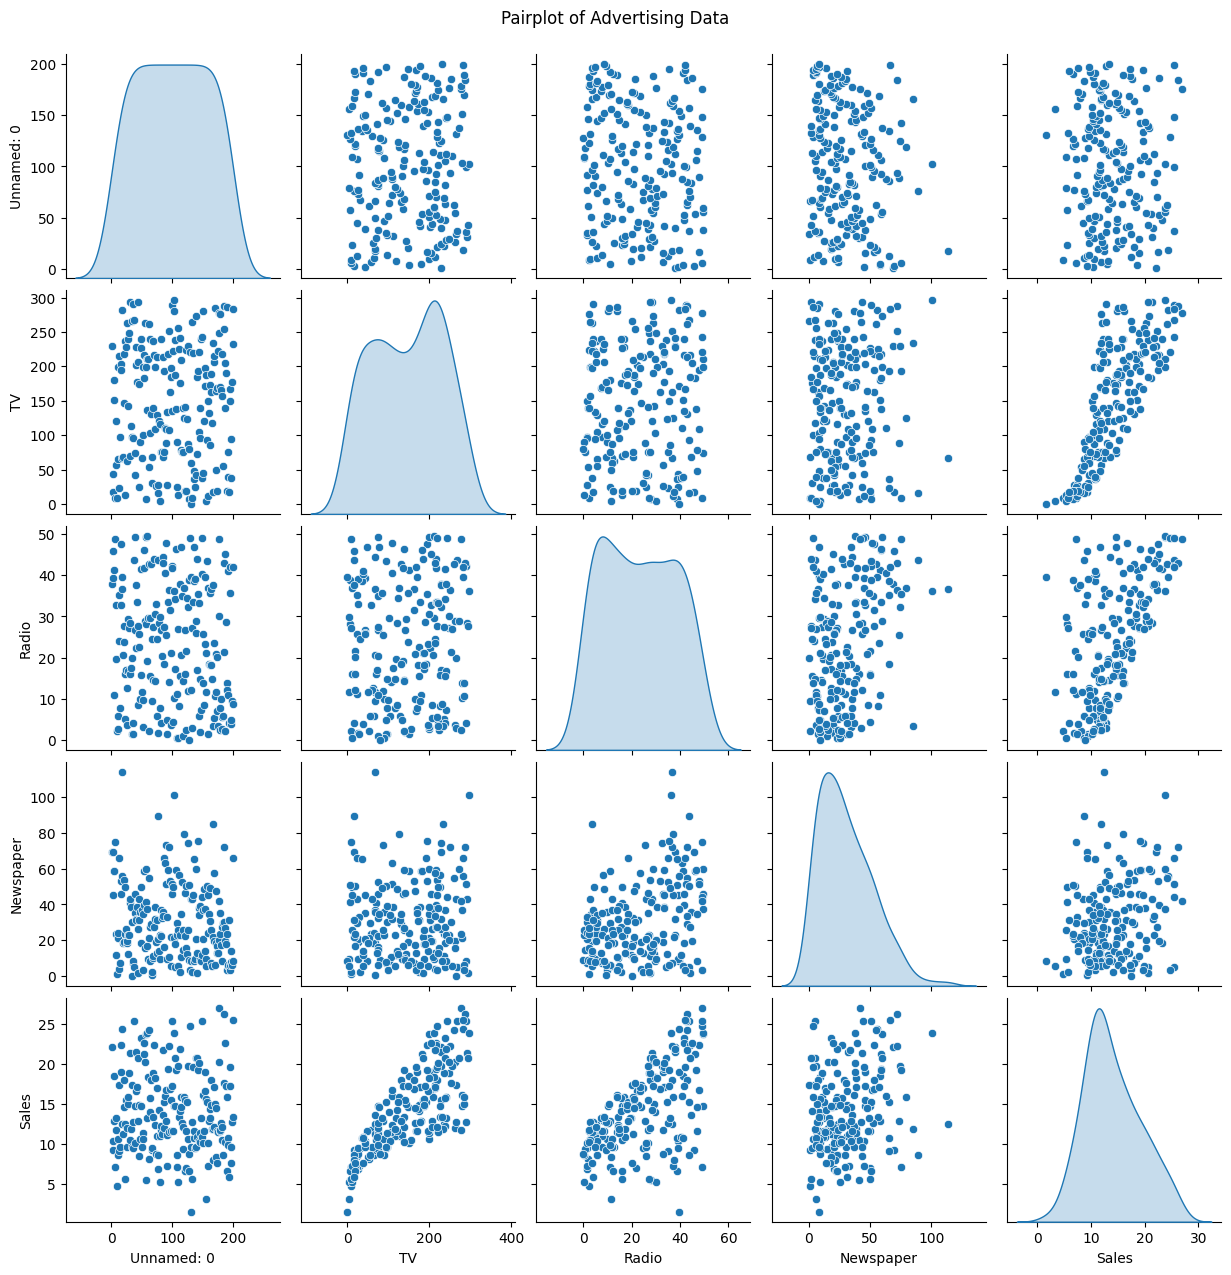

In [9]:
# Visualize the data
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pairplot of Advertising Data', y=1.02)
plt.show()



In [10]:
# Define the feature variables (X) and the target variable (y)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[model_name] = {
        'model': model,
        'mse': mse,
        'r2': r2,
        'predictions': predictions
    }



In [11]:
# Print evaluation results
for model_name, result in results.items():
    print(f"\n{model_name} Model Evaluation:")
    print(f"Mean Squared Error: {result['mse']}")
    print(f"R2 Score: {result['r2']}")




Linear Regression Model Evaluation:
Mean Squared Error: 3.1740973539761033
R2 Score: 0.899438024100912

Decision Tree Model Evaluation:
Mean Squared Error: 2.175
R2 Score: 0.9310914968293178

Random Forest Model Evaluation:
Mean Squared Error: 0.5907322499999988
R2 Score: 0.9812843792541843

Gradient Boosting Model Evaluation:
Mean Squared Error: 0.5325817328183275
R2 Score: 0.9831267080346855


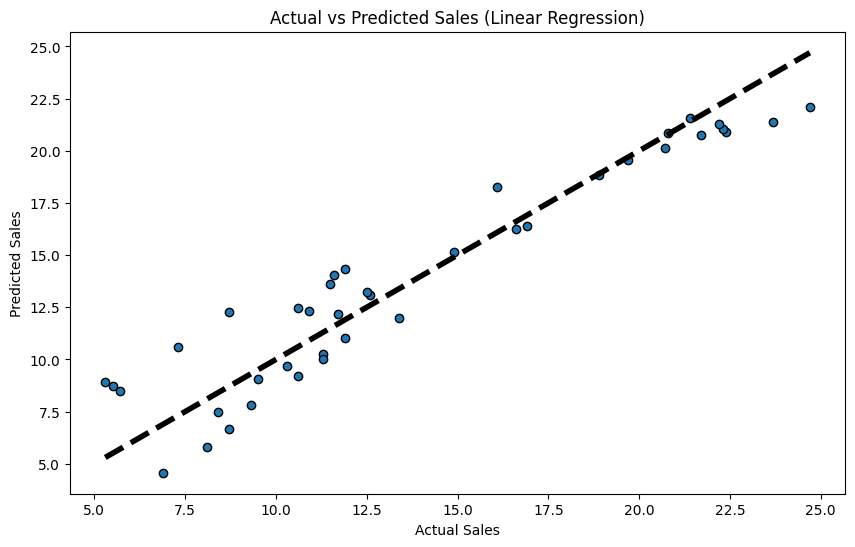

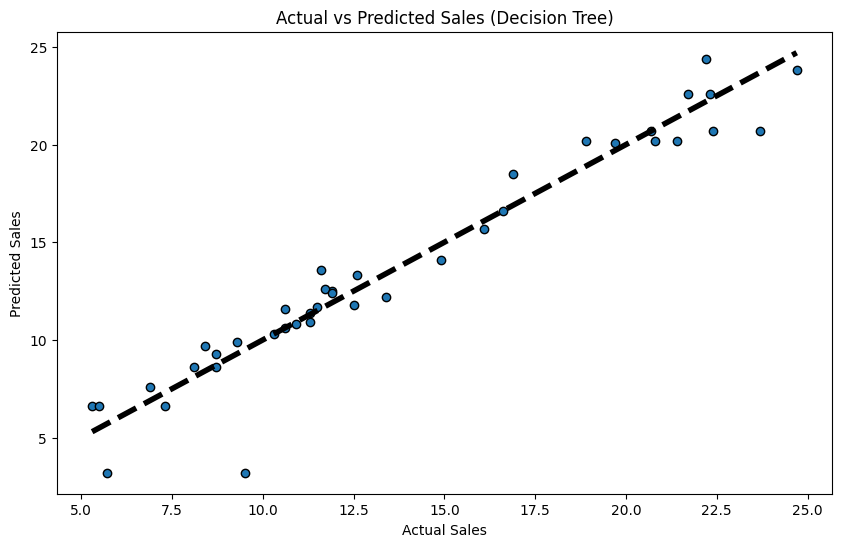

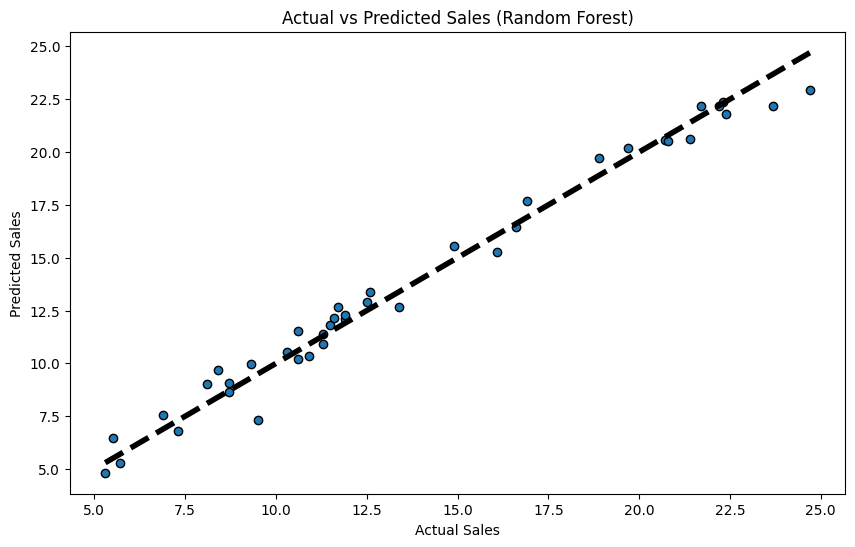

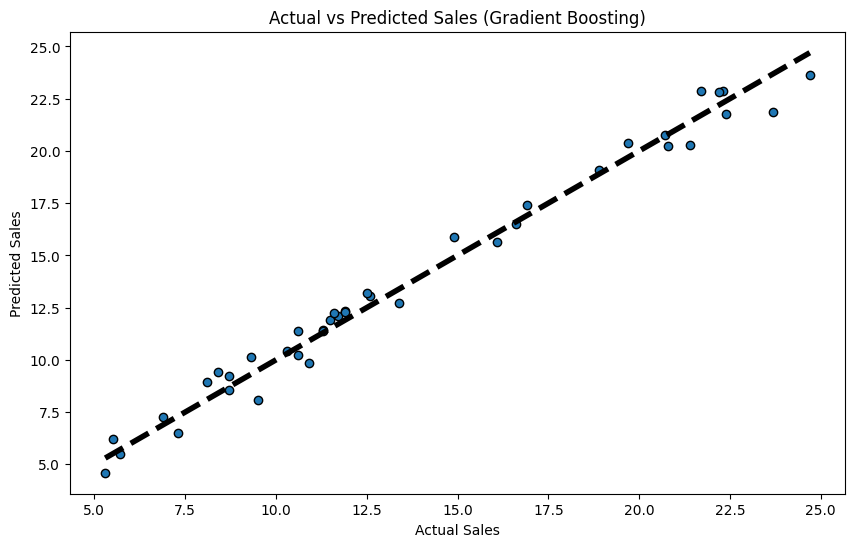

In [12]:
# Visualize the actual vs predicted sales
for model_name, result in results.items():
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, result['predictions'], edgecolors=(0, 0, 0))
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')
    plt.title(f'Actual vs Predicted Sales ({model_name})')
    plt.show()



In [13]:
# Random Forest and Gradient Boosting
for model_name in ['Random Forest', 'Gradient Boosting']:
    feature_importances = pd.DataFrame(results[model_name]['model'].feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
    print(f"\nFeature Importances ({model_name}):\n", feature_importances)
    



Feature Importances (Random Forest):
            importance
TV           0.624810
Radio        0.362201
Newspaper    0.012989

Feature Importances (Gradient Boosting):
            importance
TV           0.612579
Radio        0.380914
Newspaper    0.006507


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3872\3330088082.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.importance, y=feature_importances.index, palette="viridis")


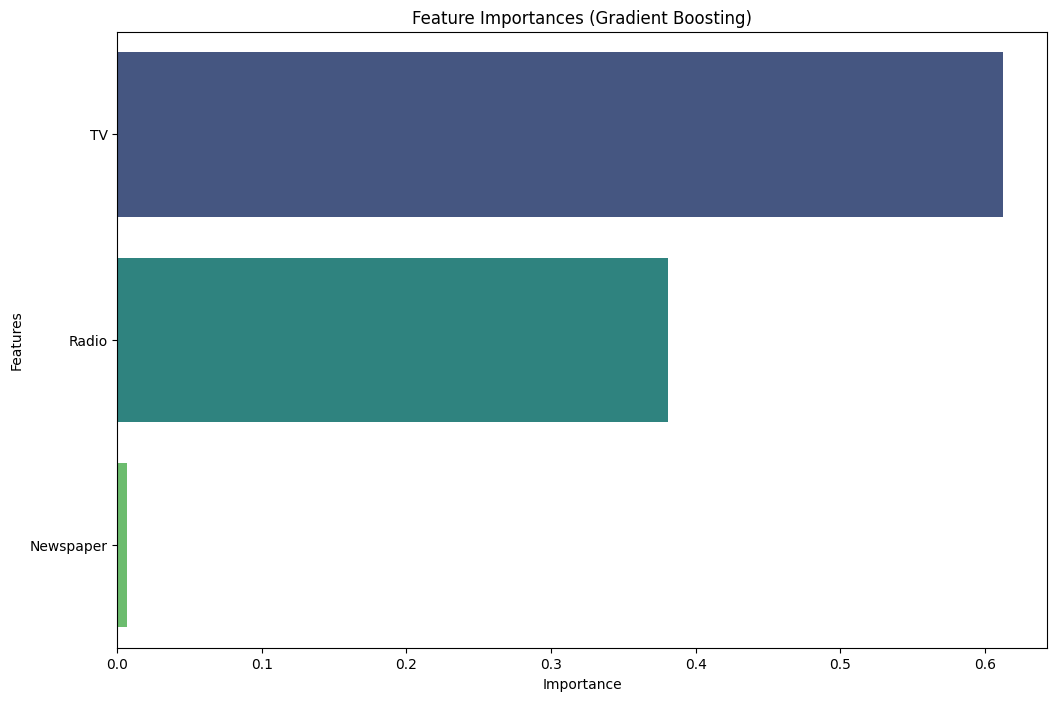

In [15]:
    # Visualize the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances.importance, y=feature_importances.index, palette="viridis")
plt.title(f'Feature Importances ({model_name})')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()



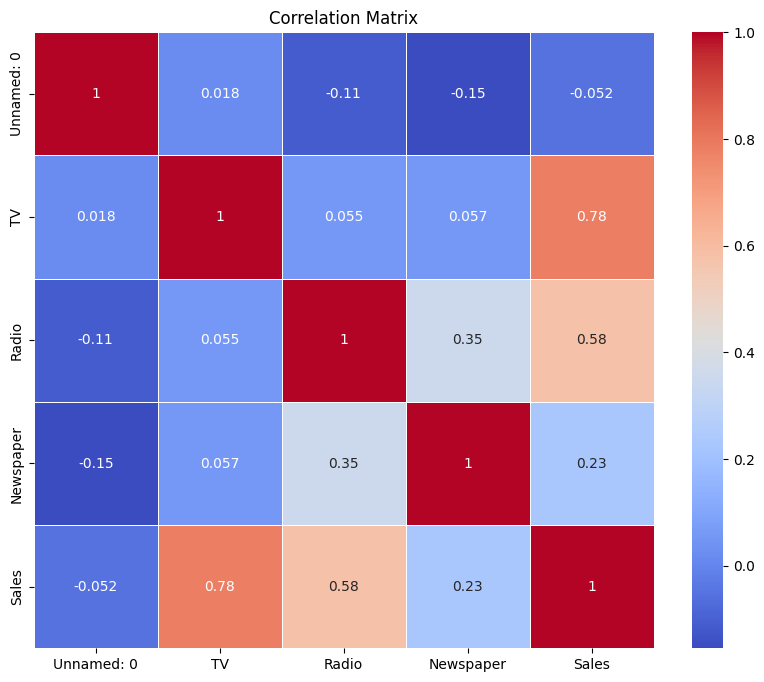

In [16]:

# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()




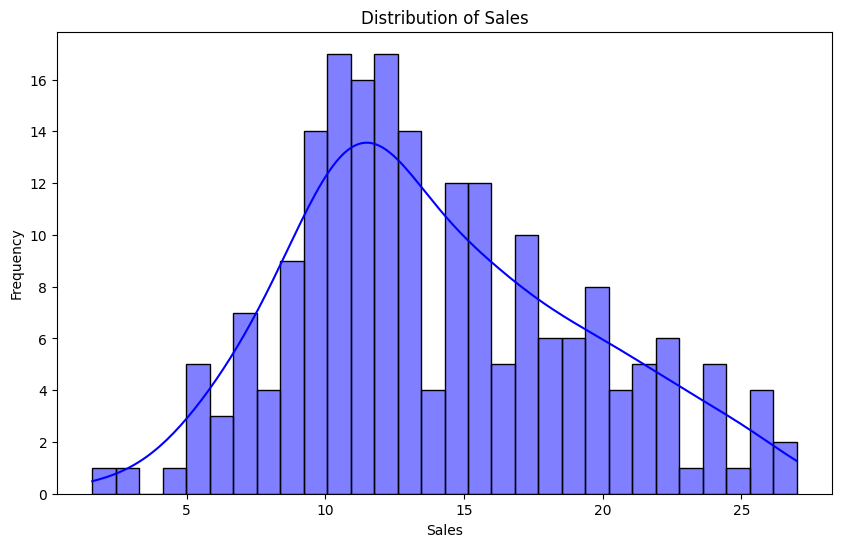

In [17]:
# Distribution of Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=30, kde=True, color='blue')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


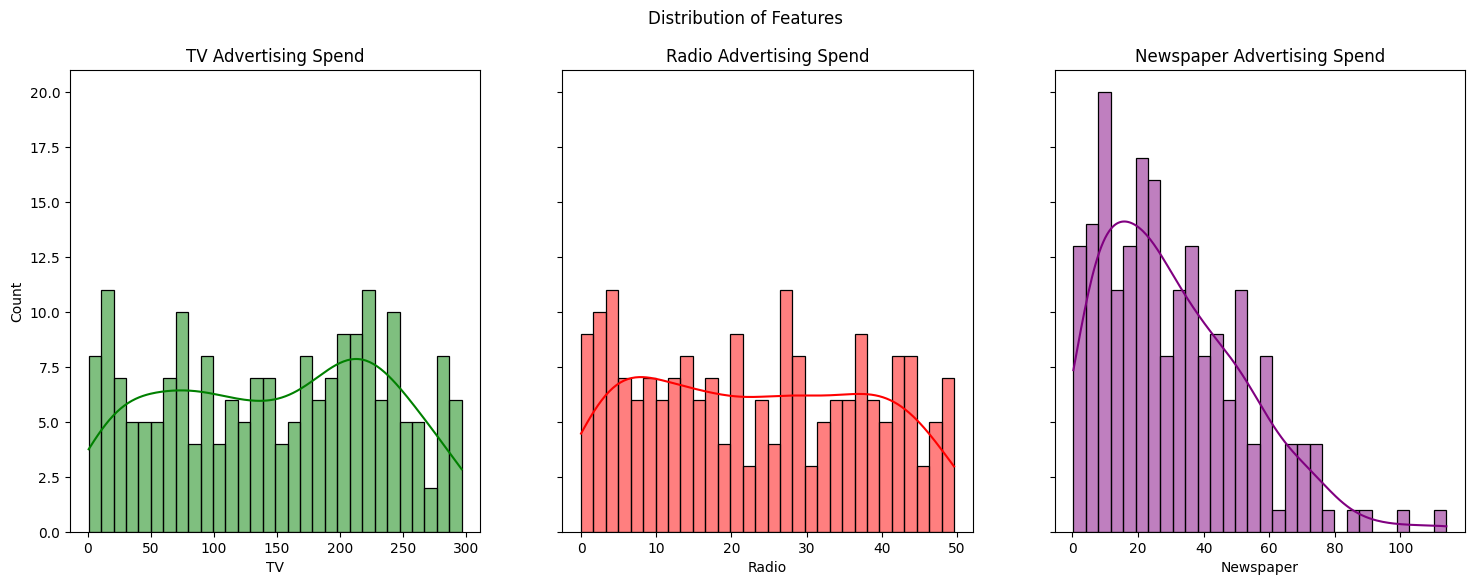

In [18]:

# Distribution of features
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('Distribution of Features')

sns.histplot(ax=axes[0], data=df, x='TV', bins=30, kde=True, color='green')
axes[0].set_title('TV Advertising Spend')

sns.histplot(ax=axes[1], data=df, x='Radio', bins=30, kde=True, color='red')
axes[1].set_title('Radio Advertising Spend')

sns.histplot(ax=axes[2], data=df, x='Newspaper', bins=30, kde=True, color='purple')
axes[2].set_title('Newspaper Advertising Spend')

plt.show()